In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df=pd.read_csv('emotions.csv')

In [ ]:
df.head(5)

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
df.columns

Index(['Unnamed: 0', 'text', 'label'], dtype='object')

## Emotions are classified into five labels:
0-sadness
1-joy
2-love
3-anger
4-fear
5-surprise

In [ ]:
df.shape

(416809, 3)

In [ ]:
df['label'].value_counts()

1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: label, dtype: int64

In [ ]:
# Check for null values in the data
df.isnull().sum()
# No null values found

Unnamed: 0    0
text          0
label         0
dtype: int64

Performing Exploratory Data Analysis

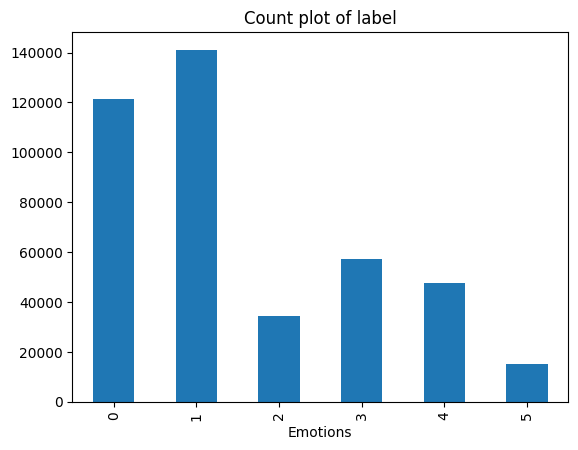

In [ ]:
ax=df['label'].value_counts().sort_index().plot(kind='bar',title='Count plot of label')
ax.set_xlabel('Emotions')
plt.show()

It is a imbalanced dataset . First let's work with this and check the results

##Method 1
Using Classic NLP model which includes stemming,tfidf and a simple decision tree classifier

In [ ]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

This process removes unwanted characters , splitting the sentence into words and checking if they are stop words . If yes then they are removed from the dataset

In [ ]:
# Step 1 : Stemming

port_stem=PorterStemmer()

def stemming(content):

  stemmed_content=re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)

  return stemmed_content



In [ ]:
df['stemmed_content']=df['text'].apply(stemming)

##Saving the data File as emotions_stemmed.csv

In [ ]:
# save the data to the directory we want
df.to_csv('drive/MyDrive/movmi-ML/emotions_stemmed.csv')

In [ ]:
df=pd.read_csv('emotions_stemmed.csv')

In [ ]:
# Seperating the data to training and testing
X=df['stemmed_content']
y=df['label'].values
string_array = []
for element in y:
  string_array.append(str(element))



In [ ]:
print(X)

0                          feel realli helpless heavi heart
1         ive enjoy abl slouch relax unwind frankli need...
2                      gave internship dmrg feel distraught
3                                       dont know feel lost
4         kindergarten teacher thoroughli weari job take...
                                ...                        
416804    feel like tell horni devil find site suit sort...
416805    began realiz feel agit restless would thought ...
416806      feel curiou previou earli dawn time seek troubl
416807    feel becuas tyran natur govern el salvador sav...
416808    think spent time investig surround thing start...
Name: stemmed_content, Length: 416809, dtype: object


In [ ]:
print(y)

[4 0 4 ... 5 3 5]


In [ ]:
# Splitting the data into training and testing
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
# Converting text data to numerical data
vectorizer=TfidfVectorizer()

#X_train=vectorizer.fit_transform(X_train)

X_train=vectorizer.fit_transform(X_train.values.astype('U'))


In [ ]:
X_test=vectorizer.transform(X_test.values.astype('U'))

Training the ML model . I have selected Decision Tree classifier for my application

## METHOD 1: Decision Tree CLassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

Model Evaluation : I am using classification report to measure the various metrics properties

In [ ]:
model_predictions=model.predict(X_test)

In [ ]:
import pickle
filename ='drive/MyDrive/movmi-ML/trained_model1.sav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model_predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     24238
           1       0.83      0.83      0.83     28214
           2       0.60      0.56      0.58      6911
           3       0.81      0.82      0.81     11463
           4       0.73      0.76      0.74      9542
           5       0.58      0.55      0.56      2994

    accuracy                           0.80     83362
   macro avg       0.73      0.73      0.73     83362
weighted avg       0.80      0.80      0.80     83362



The model achieves an accuracy of 80%. However, the precision and recall metrics for classes 2 and 5 are relatively low, likely due to the limited number of samples in the dataset for these labels. One potential solution is to address the data imbalance by ensuring equal representation across all classes.

We could either try to make the dataset balanced or use more complex models which are robust to Imbalanced data

##Method 2 : Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model1=GradientBoostingClassifier()

model1.fit(X_train,y_train)



GradientBoostingClassifier()

In [ ]:
model1_predictions=model1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model1_predictions))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     24238
           1       0.72      0.93      0.81     28214
           2       0.80      0.56      0.66      6911
           3       0.91      0.72      0.81     11463
           4       0.90      0.71      0.79      9542
           5       0.64      0.93      0.76      2994

    accuracy                           0.81     83362
   macro avg       0.82      0.78      0.78     83362
weighted avg       0.83      0.81      0.81     83362



The Gradient boosting model gave me a better accuracy and the metrics parameters are improved comparetively

In [ ]:
import pickle
filename ='trained_model_GradientBoosting.pkl'
pickle.dump(model,open(filename,'wb'))

In [ ]:
# Converting text data to numerical data
text='The food was soo bad I loved it'

test=vectorizer.transform([text])

prediction=model.predict(test)



## METHOD 3: Making the data more balanced





In [ ]:
from sklearn.utils import resample
# Define the target sample sizes for oversampling and undersampling
target_sample_size_oversample = 50000
target_sample_size_undersample = 60000

# Oversample classes with fewer samples
classes_to_oversample = [2, 3, 4, 5]
oversampled_data = []
for label in classes_to_oversample:
    class_data = df[df['label'] == label]
    if len(class_data) < target_sample_size_oversample:
        oversampled_class = resample(class_data, replace=True, n_samples=target_sample_size_oversample, random_state=42)
        oversampled_data.append(oversampled_class)
    else:
        oversampled_data.append(class_data)

# Undersample classes 0 and 1
classes_to_undersample = [0, 1]
undersampled_data = []
for label in classes_to_undersample:
    class_data = df[df['label'] == label]
    undersampled_class = resample(class_data, replace=False, n_samples=target_sample_size_undersample, random_state=42)
    undersampled_data.append(undersampled_class)

# Concatenate oversampled and undersampled data
balanced_df = pd.concat(oversampled_data + undersampled_data)

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the class distribution after balancing
print(balanced_df['label'].value_counts())

0    60000
1    60000
3    57317
2    50000
4    50000
5    50000
Name: label, dtype: int64


In [ ]:
df['stemmed_content']=df['text'].apply(stemming)

In [ ]:
df.to_csv('emotions_stemmed_balanced.csv')

In [ ]:
df=pd.read_csv('emotions_stemmed_balanced.csv')

In [ ]:

# Splitting the data into training and testing
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
# Converting text data to numerical data
vectorizer=TfidfVectorizer()

#X_train=vectorizer.fit_transform(X_train)

X_train=vectorizer.fit_transform(X_train.values.astype('U'))

In [ ]:
X_test=vectorizer.transform(X_test.values.astype('U'))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier()

model.fit(X_train,y_train)

import pickle
filename ='Gradient_boosting_balanced.pkl'
pickle.dump(model,open(filename,'wb'))



In [ ]:
import joblib
model=joblib.load('Gradient_boosting_balanced.pkl')




In [ ]:
text="Received a threatening message from an unknown number. Feeling anxious and fearful about my safety"

test=vectorizer.transform([text])

prediction=model.predict(test)

prediction

array([1])

However, these models lack effectiveness in real-world scenarios. It's crucial to develop a model capable of processing larger input sequences, which can be achieved through self-attention layers allowing parallel word analysis. Consequently, I implemented an LSTM model to assess its suitability for real-world scenarios.